In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
df = pd.read_csv("Customer Churn.csv")

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 and no total charges are recorded

In [56]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [60]:
df.duplicated().sum()

0

In [61]:
df['customerID'].duplicated().sum()                         #checking duplicate for primary key

0

In [62]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})  # changing 0 to yes and 1 to no in SeniorCitizen

In [63]:
df['SeniorCitizen'].nunique()

2

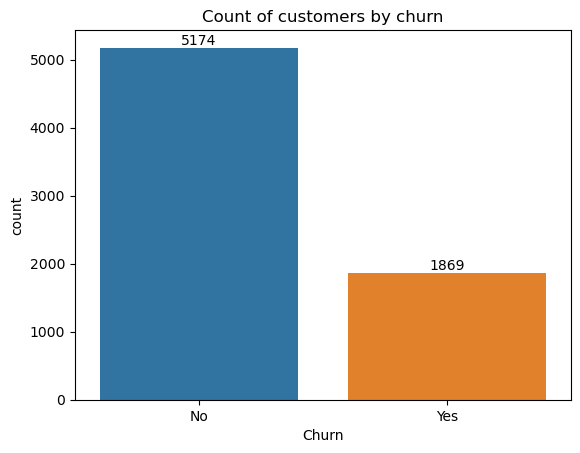

In [64]:
ax = sns.countplot(data= df, x = 'Churn')

ax.bar_label(ax.containers[0])

plt.title('Count of customers by churn')
plt.show()

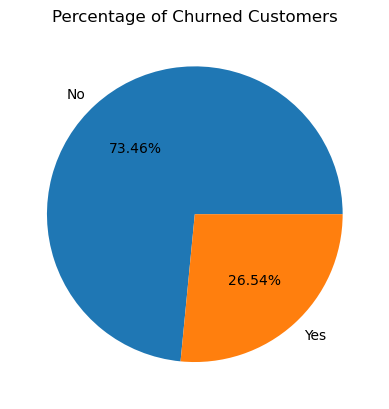

In [65]:
gb = df.groupby('Churn').agg({'Churn':'count'})

plt.pie(x = gb['Churn'],labels=gb.index, autopct = '%1.2f%%')

plt.title('Percentage of Churned Customers')

plt.show()

from given  pie chart we can conclude that 26.54% of the total customers are churned. We need to figure out the reason for the same.

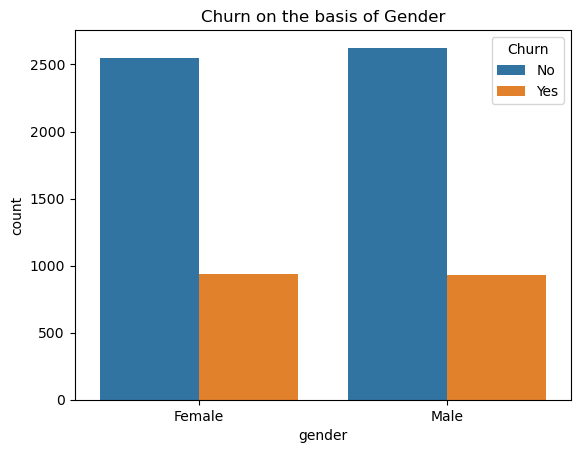

In [66]:
sns.countplot(data=df, x= 'gender',hue = 'Churn') #churning is not gender specific

plt.title('Churn on the basis of Gender')
plt.show()

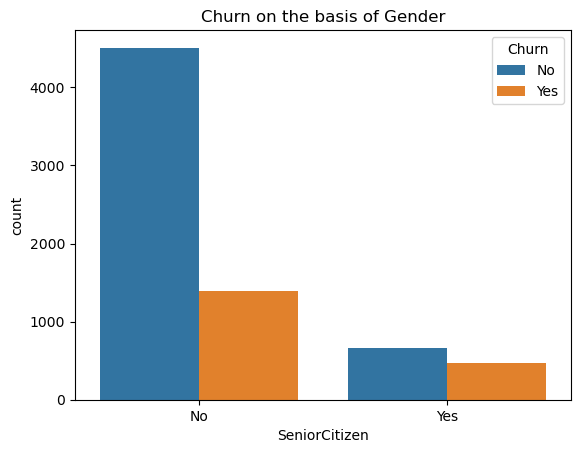

In [67]:
sns.countplot(data=df, x= 'SeniorCitizen',hue = 'Churn')                                    #churning is not gender specific

plt.title('Churn on the basis of Gender')

plt.show()

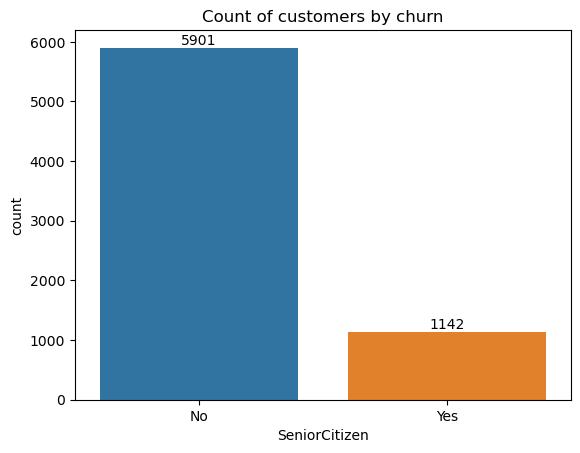

In [75]:
ax = sns.countplot(data= df, x = 'SeniorCitizen')

ax.bar_label(ax.containers[0])

plt.title('Count of customers by churn')
plt.show()

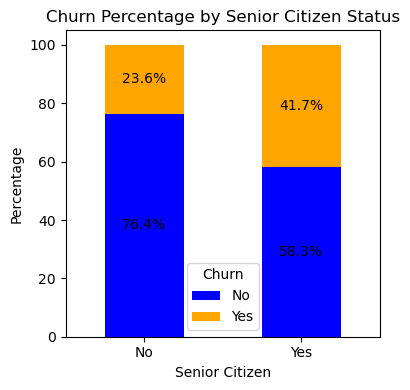

In [73]:
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(4, 4))

plt.title('Churn Percentage by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.xticks(rotation=0)

# Step 4: Add percentage labels
for i, (index, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10)
            cumulative += value

plt.tight_layout()
plt.show()

compratively a large % of Senior Citizen have churned

C:\Users\nehap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


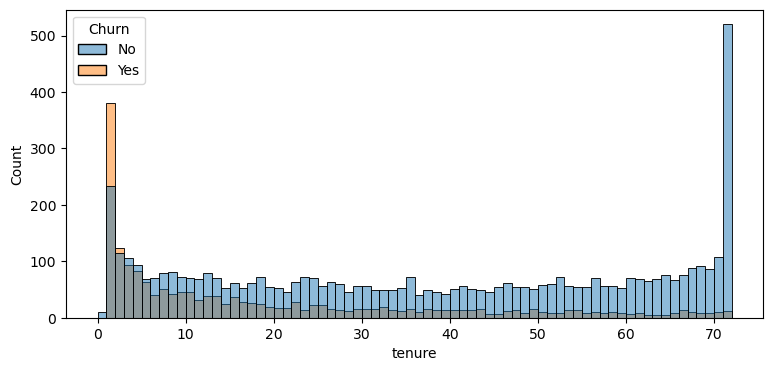

In [82]:
plt.figure(figsize=(9,4))

sns.histplot(x = 'tenure', data = df,bins = 72, hue = 'Churn')
plt.show()

People who have used our services for a long time shows almost negligible or no churn while people who have used our services for 1 month have churned

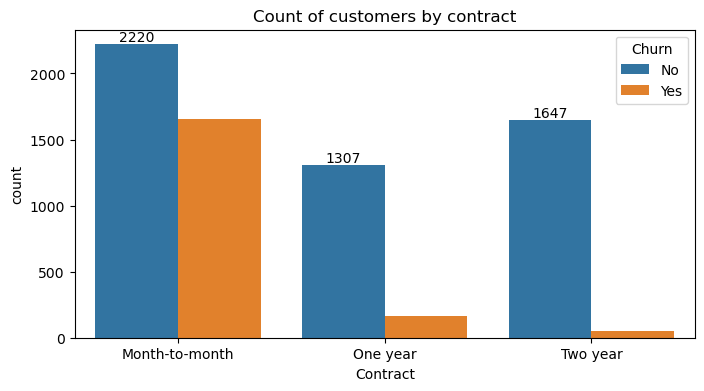

In [89]:
plt.figure(figsize = (8,4))

ax = sns.countplot(data= df, x = 'Contract',hue='Churn')

ax.bar_label(ax.containers[0])

plt.title('Count of customers by contract')
plt.show()

People with month to month contract are likely to churn then those who have 1 or 2 month of contract

In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

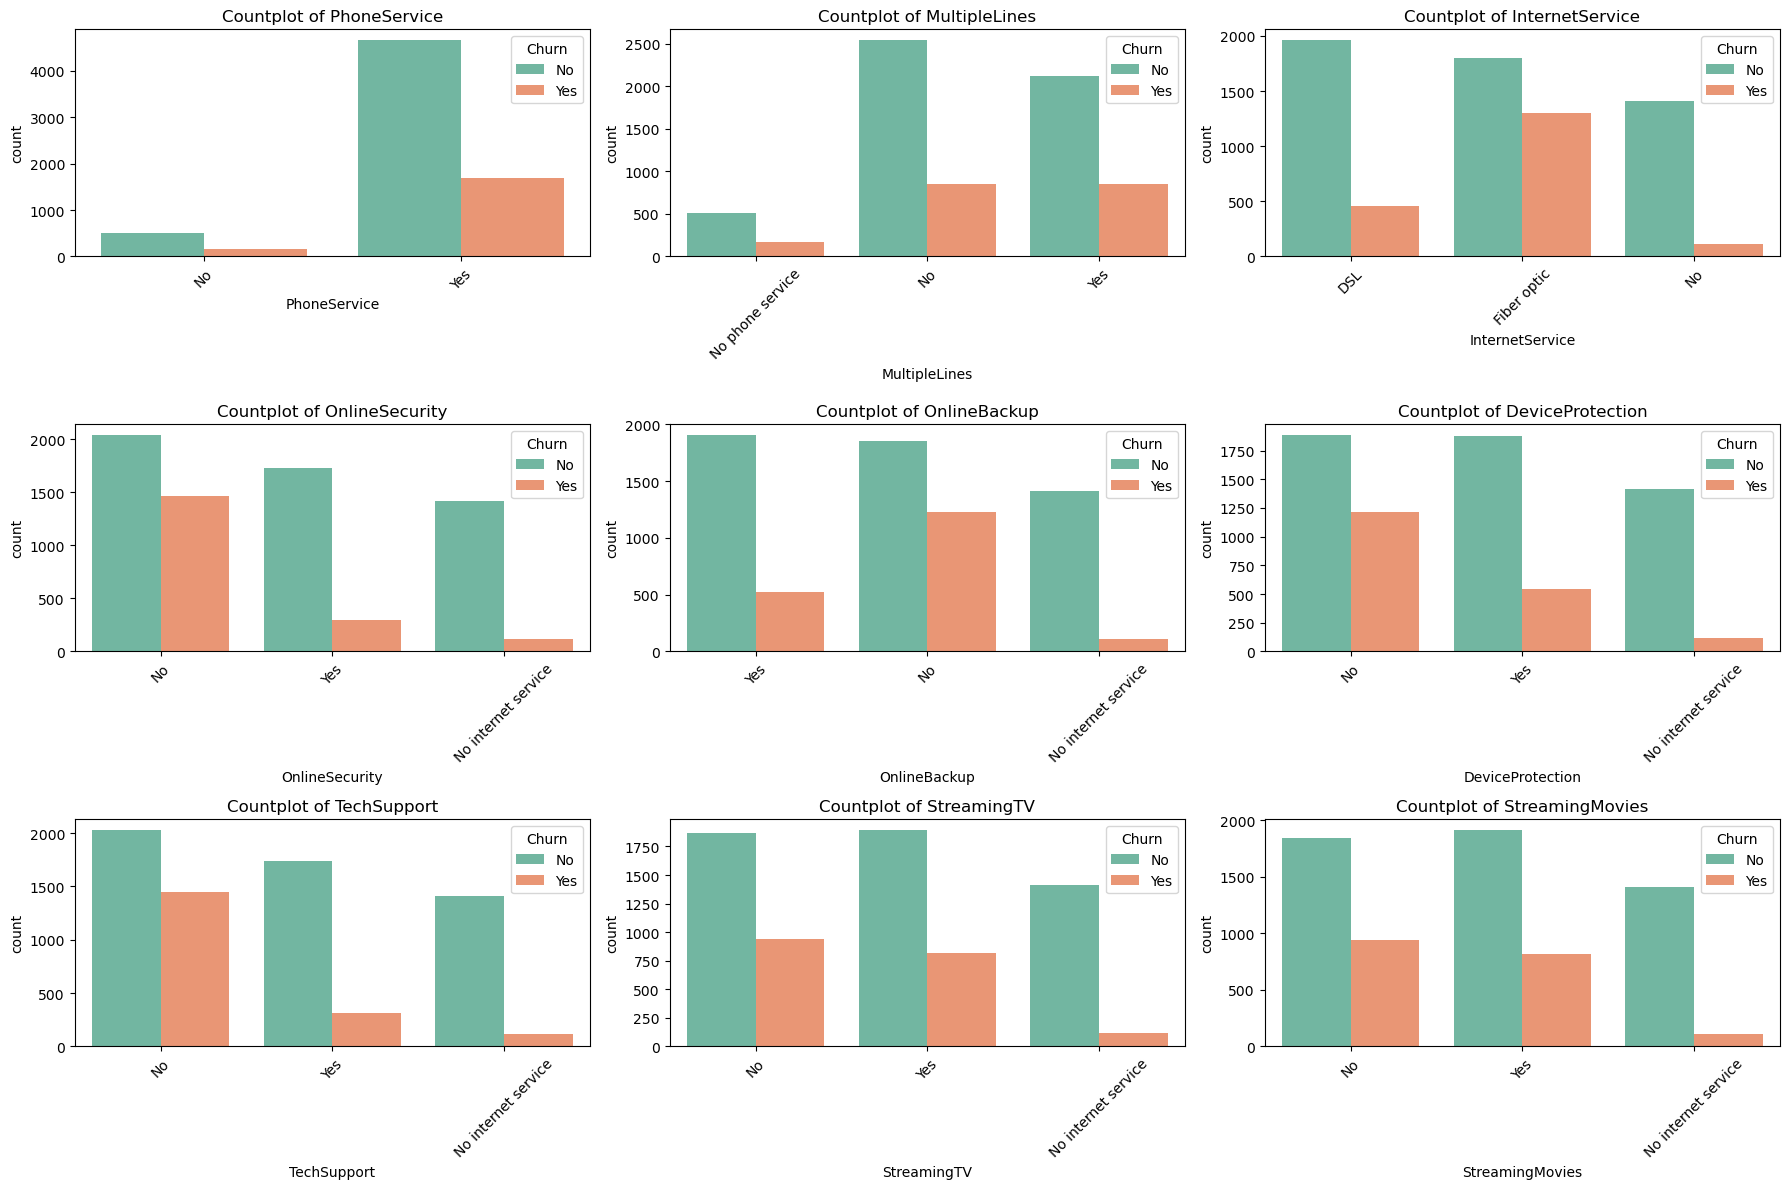

In [96]:
# List of service-related columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set figure size depending on how many plots you want per row
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # to make it easy to index

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2',hue = 'Churn')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots if cols isn't a perfect square
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not hae churn tends to have services like PhoneServices, InternetServices and online Security enabled.

OnlineBackup, TechSupport and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

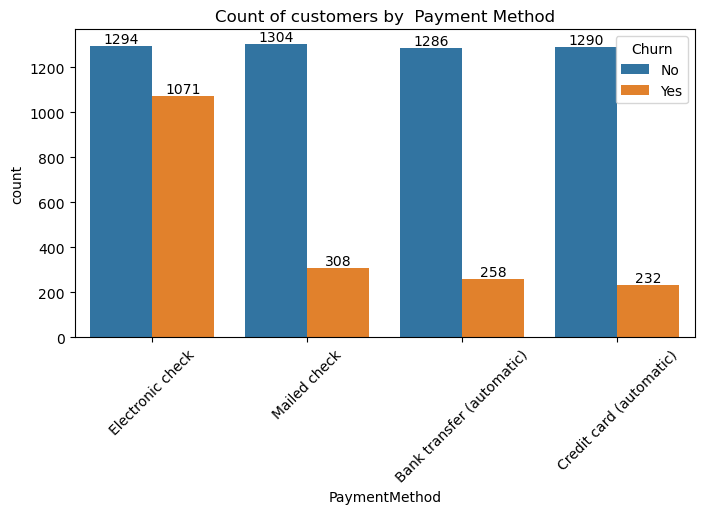

In [101]:
plt.figure(figsize = (8,4))

ax = sns.countplot(data= df, x = 'PaymentMethod',hue='Churn')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)

plt.title('Count of customers by  Payment Method')

plt.show()

Customer is likely to churn when he is using Electronic Check